In [52]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf

In [53]:
GOOGL_stock = pd.read_csv('./datas/GOOGL_stock.csv')
AAPL_stock = pd.read_csv('./datas/AAPL_stock.csv')
PEP_stock = pd.read_csv('./datas/PEP_stock.csv')

In [54]:
def calculate_volatility(name ,data: pd.DataFrame):
    # Calculate the daily logarithmic returns
    data['LogReturns'] = np.log(data['close']/data['close'].shift(1))

    data.dropna()
    mean_log_return = np.mean(data['LogReturns'])
    
    # Calculate the squared deviation using .loc accessor and avoid the SettingWithCopyWarning
    data.loc[:, 'squared_deviation'] = data['LogReturns'].map(lambda x: (x - mean_log_return) ** 2).copy()
    
    # Reset the index
    total = data['squared_deviation'].sum()
    hv = np.sqrt(22*total/(data.shape[0]-1))
    return (name,hv)
print(calculate_volatility('GOOGL_stock',GOOGL_stock))
print(calculate_volatility('AAPL_stock',AAPL_stock))
print(calculate_volatility('PEP_stock',PEP_stock))

('GOOGL_stock', 0.09051206195477908)
('AAPL_stock', 0.13406622802383755)
('PEP_stock', 0.20888566898850108)


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
def create_tema(
        stock: pd.DataFrame, 
        MA_period:int 
        ):

    ema1 = ta.ema(stock['close'], length=MA_period)

    # Calculate the second EMA
    ema2 = ta.ema(ema1, length=MA_period)

    # Calculate the third EMA
    ema3 = ta.ema(ema2, length=MA_period)

    # Calculate TEMA
    tema = 3 * (ema1 - ema2) + ema3
    #stock[f'tema_{MA_period}'] = tema
    return tema

In [56]:
AAPL_stock['tema_10'] = create_tema(AAPL_stock, 10)
AAPL_stock['tema_100'] = create_tema(AAPL_stock, 100)

print(AAPL_stock)

        date_time symbol        high         low        open       close  \
0      1980-12-12   AAPL    0.128906    0.128348    0.128348    0.128348   
1      1980-12-15   AAPL    0.122210    0.121652    0.122210    0.121652   
2      1980-12-16   AAPL    0.113281    0.112723    0.113281    0.112723   
3      1980-12-17   AAPL    0.116071    0.115513    0.115513    0.115513   
4      1980-12-18   AAPL    0.119420    0.118862    0.118862    0.118862   
...           ...    ...         ...         ...         ...         ...   
10721  2023-06-23   AAPL  187.559998  185.009995  185.550003  186.679993   
10722  2023-06-26   AAPL  188.050003  185.229996  186.830002  185.270004   
10723  2023-06-27   AAPL  188.389999  185.669998  185.889999  188.059998   
10724  2023-06-28   AAPL  189.899994  187.600006  187.929993  189.250000   
10725  2023-06-29   AAPL  190.070007  188.940002  189.080002  189.589996   

        adj_close     volume  LogReturns  squared_deviation     tema_10  \
0        0.0

In [57]:
AAPL_stock['date_time'] = pd.to_datetime(AAPL_stock['date_time'])
AAPL_stock = AAPL_stock.set_index('date_time')


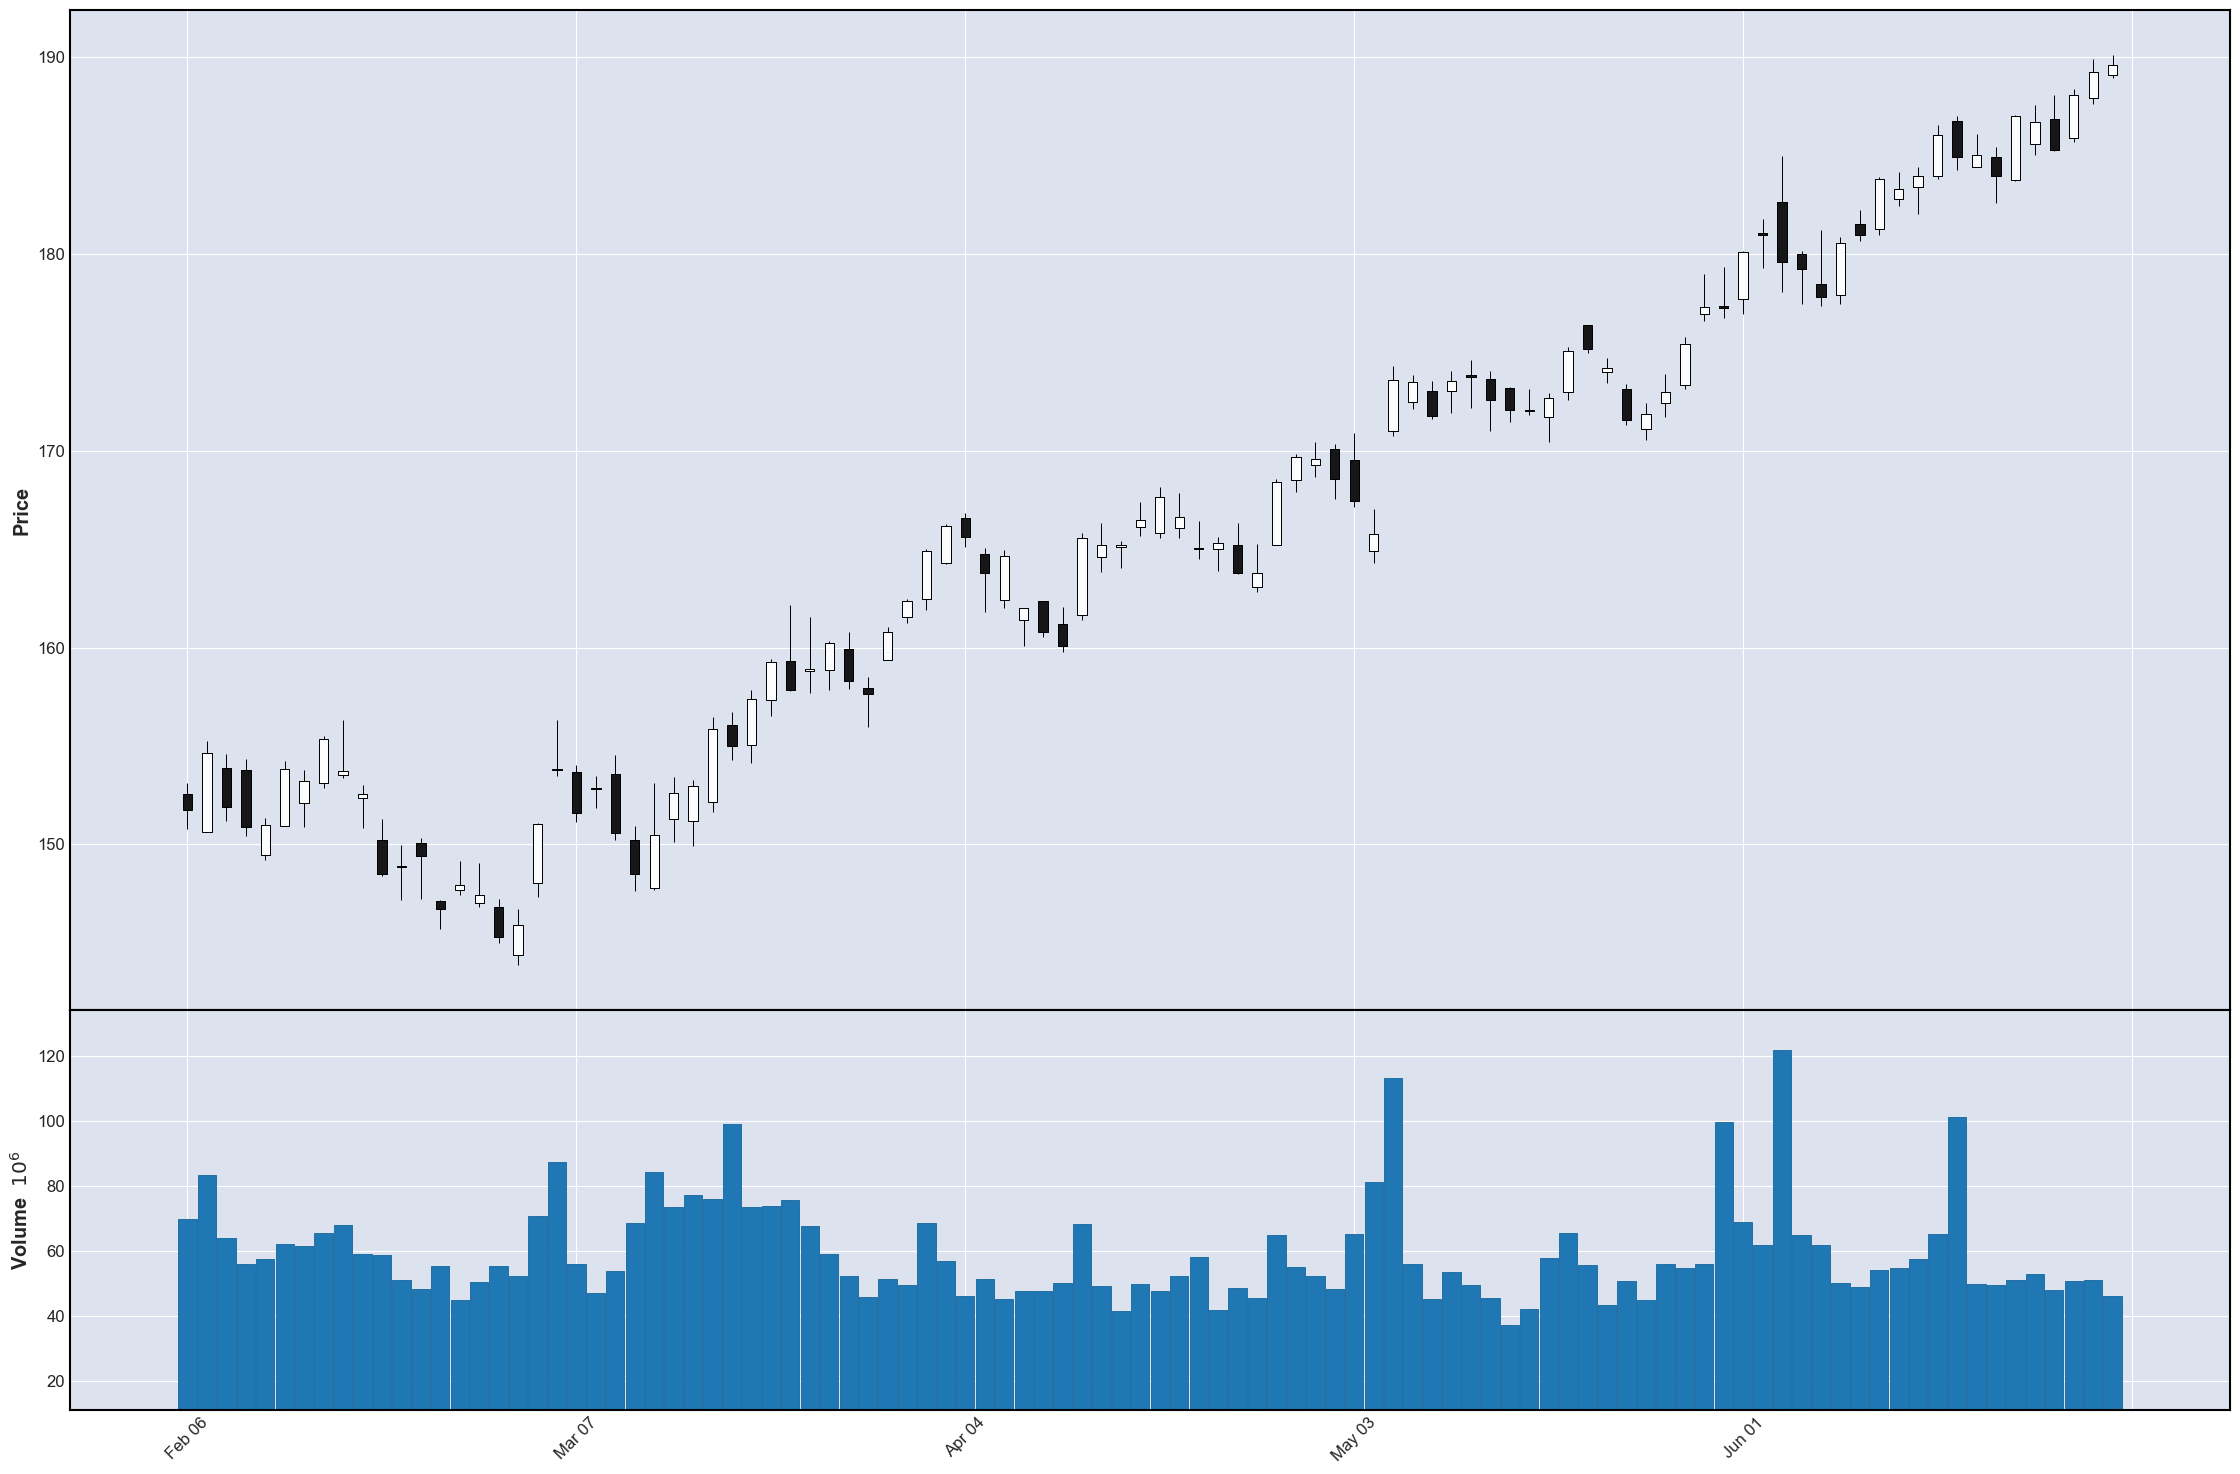

In [100]:
mpf.plot(AAPL_stock[-100:],type='candle',
         #mav=(10),
         volume = True, 
         #show_nontrading=True,
        figsize=(30,20),
        )
         #addplot=[mpf.make_addplot(AAPL_stock['tema_10'][-100:])])

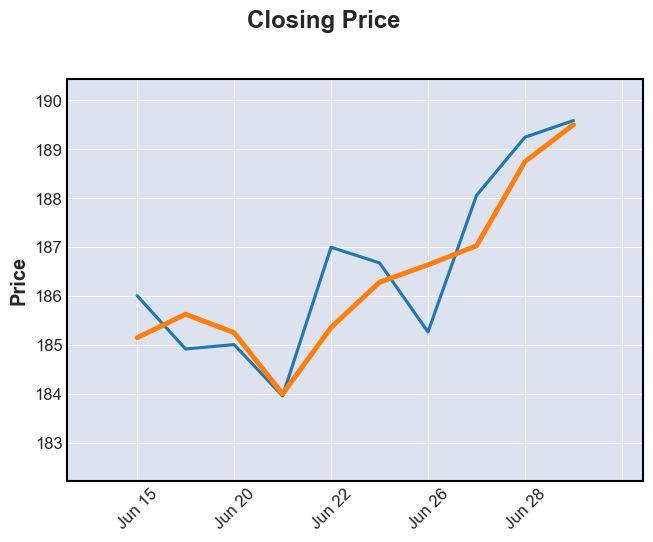

In [97]:
mpf.plot(AAPL_stock[-10:], type='line', title='Closing Price', ylabel='Price'
         ,addplot=[
            # mpf.make_addplot(AAPL_stock['tema_10'][-300:]),
            #mpf.make_addplot(AAPL_stock['tema_100'][-300:]),
            mpf.make_addplot(((AAPL_stock['high']+AAPL_stock['low'])/2)[-10:])
                   ]
                   )


In [60]:
def calculate_MA_smoothness( ma:pd.Series):
    diff_i = ma -ma.shift(1)
    diff_i = diff_i.dropna()
    smooth =(diff_i-diff_i.shift(1)).dropna()
    smooth = smooth.abs().mean()
    return smooth
def calculate_MA_lag(stock: pd.DataFrame, ma:pd.Series):
    lag = (stock['close']-ma).dropna()
    lag= lag.abs().mean()
    return lag

print(calculate_MA_lag(AAPL_stock, AAPL_stock['tema_10']))
print(calculate_MA_lag(AAPL_stock, AAPL_stock['tema_100']))

print(calculate_MA_smoothness(AAPL_stock['tema_10']))
print(calculate_MA_smoothness(AAPL_stock['tema_100']))

0.1729847780152097
0.770115629079954
0.12817914817277784
0.015006729591741484


In [72]:
AAPL_stock['tema_20'] = create_tema(AAPL_stock, 20)
print(calculate_MA_lag(AAPL_stock, AAPL_stock['tema_2']))
print(calculate_MA_smoothness(AAPL_stock['tema_2']))

0.013998325543683509
0.3399558851966826


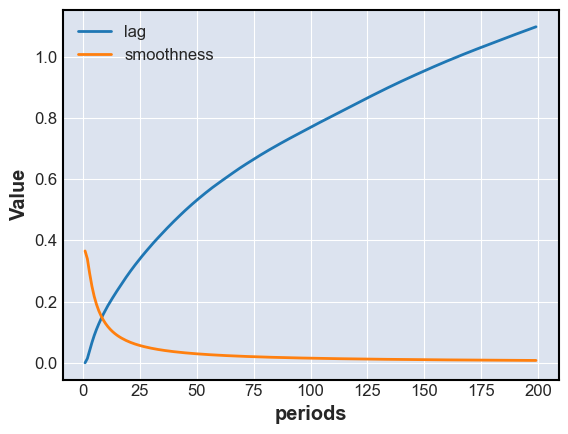

In [79]:
import matplotlib.pyplot as plt

periods = []
lag = []
smoothness = []

test = AAPL_stock


for i in range(1,200):
    tema = create_tema(test, i)
    periods.append(i)
    lag.append(calculate_MA_lag(test, tema))
    smoothness.append(calculate_MA_smoothness(tema))
# Plotting
plt.plot(periods, lag, label='lag')
plt.plot(periods, smoothness, label='smoothness')

plt.xlabel('periods')
plt.ylabel('Value')
plt.legend()
plt.show()

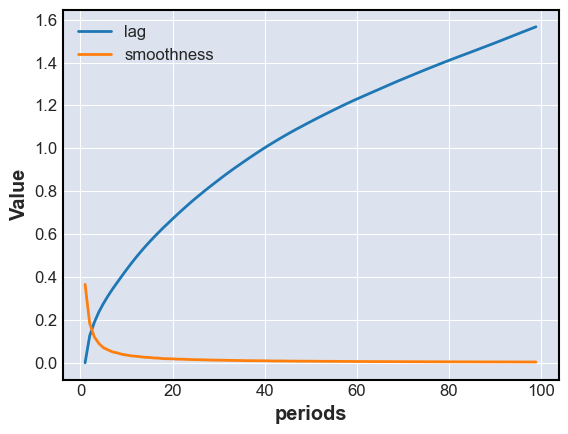

In [83]:
#data['SMA'] = ta.sma(data['Close'], length=20)
SMA_periods = []
SMA_lag = []
SMA_smoothness = []
for i in range(1,100):
    sma = ta.sma(test['close'], length=i)
    SMA_periods.append(i)
    SMA_lag.append(calculate_MA_lag(test, sma))
    SMA_smoothness.append(calculate_MA_smoothness(sma))
# Plotting
plt.plot(SMA_periods, SMA_lag, label='lag')
plt.plot(SMA_periods, SMA_smoothness, label='smoothness')

plt.xlabel('periods')
plt.ylabel('Value')
plt.legend()
plt.show()

In [88]:
#for i in range(0,1):
    #AAPL_stock = AAPL_stock.drop(columns=[f'tema_{i}'])
AAPL_stock = AAPL_stock = AAPL_stock.drop(columns=['LogReturns',	'squared_deviation'])

In [92]:
AAPL_stock['tema_8'] = create_tema(AAPL_stock, 8)
AAPL_stock['tema_2'] = create_tema(AAPL_stock, 2)
AAPL_stock['tema_100'] = create_tema(AAPL_stock, 100)

In [94]:
AAPL_stock.dropna()

,symbol,high,low,open,close,adj_close,volume,tema_8,tema_2,tema_100
date_time,,,,,,,,,,
1981-05-06,AAPL,0.122768,0.122210,0.122768,0.122210,0.094821,18950400,0.123887,0.122307,0.124665
1981-05-07,AAPL,0.124442,0.123884,0.123884,0.123884,0.096120,9363200,0.123520,0.123690,0.124620
1981-05-08,AAPL,0.125558,0.125000,0.125000,0.125000,0.096986,7907200,0.123940,0.124981,0.124641
1981-05-11,AAPL,0.122768,0.122210,0.122768,0.122210,0.094821,11939200,0.122761,0.122383,0.124499
1981-05-12,AAPL,0.123884,0.122210,0.122210,0.122210,0.094821,4256000,0.122099,0.122134,0.124362
...,...,...,...,...,...,...,...,...,...,...
2023-06-23,AAPL,187.559998,185.009995,185.550003,186.679993,186.679993,53079300,186.715797,186.786946,185.522576
2023-06-26,AAPL,188.050003,185.229996,186.830002,185.270004,185.270004,48088700,186.182424,185.347501,185.999949
2023-06-27,AAPL,188.389999,185.669998,185.889999,188.059998,188.059998,50730800,187.280043,187.899925,186.613868


In [95]:
AAPL_stock.to_csv('test.csv')